In [1]:
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Processing Text

import nltk
from nltk.stem.snowball import SnowballStemmer#stemmer
from sklearn.feature_extraction.text import TfidfVectorizer#embeddings
from sklearn.metrics.pairwise import cosine_similarity #similarity

#TO DISLPLAy images
from skimage import io
#to save required files
import pickle 

import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv('C:\DEPI\Recommendation system\movies.csv')
df

id                           title                    genres  \
0       760161              Orphan: First Kill           Horror-Thriller   
1       718930                    Bullet Train    Action-Comedy-Thriller   
2       744276                After Ever Happy             Romance-Drama   
3       579974                             RRR              Action-Drama   
4       532639                       Pinocchio  Fantasy-Adventure-Family   
...        ...                             ...                       ...   
744488  842334   Mahal... Ginagabi Ka Na Naman                    Action   
744489  778715  Party Time Starring Dennis Awe                       NaN   
744490  838328                   Old Long Stay                       NaN   
744491  837456                           永远十九岁                       NaN   
744492  968161                   Gising Sining                       NaN   

       original_language                                           overview  \
0                     en  After escaping from an Estonian psychiatric fa...   
1                     en  Unlucky assassin Ladybug is determined to do h...   
2                     en  As a shocking truth about a couple's families ...   
3                     te  A fictional history of two legendary revolutio...   
4                     en  A wooden puppet embarks on a thrilling adventu...   
...                  ...                                                ...   
744488                en  FPJ reprises his role as Johnny the loving and...   
744489                en  Showcase Productions is proud to present Denni...   
744490                ja  Despite being born and raised in Japan having ...   
744491                zh                                                NaN   
744492                tl  In a country where fascism foolishness of peop...   

        popularity                               production_companies  \
0         8098.027  Dark Castle Entertainment-Entertainment One-Ea...   
1         7949.491              Columbia Pictures-87North Productions   
2         4017.342  Voltage Pictures-Vertical Entertainment-CalMap...   
3         3416.323     Lyca Productions-DVV Entertainment-Pen Studios   
4         3239.378                Walt Disney Pictures-Depth of Field   
...            ...                                                ...   
744488       0.600                                                NaN   
744489       0.600                                                NaN   
744490       0.600                                                NaN   
744491       0.600                                                NaN   
744492       0.600                                          Studio RD   

       release_date      budget      revenue  runtime    status  \
0        2022-07-27         0.0    9572765.0     99.0  Released   
1        2022-07-03  90000000.0  231398720.0    126.0  Released   
2        2022-08-24         0.0          0.0     95.0  Released   
3        2022-03-24  69000000.0  160000000.0    182.0  Released   
4        2022-09-07         0.0          0.0    105.0  Released   
...             ...         ...          ...      ...       ...   
744488   1979-06-19         0.0          0.0    116.0  Released   
744489   1991-01-01         0.0          0.0     90.0  Released   
744490   2020-09-21         0.0          0.0    170.0  Released   
744491   2000-01-01         0.0          0.0      0.0  Released   
744492          NaN         0.0          0.0     19.0  Released   

                                                 tagline  vote_average  \
0       There's always been something wrong with Esther.         6.963   
1             The end of the line is just the beginning.         7.497   
2                     They can't stop loving each other.         6.830   
3                                    Rise, roar, revolt.         7.774   
4                                  The timeless classic.         6.753   
...                     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744493 entries, 0 to 744492
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    744493 non-null  int64  
 1   title                 744487 non-null  object 
 2   genres                523793 non-null  object 
 3   original_language     744493 non-null  object 
 4   overview              623360 non-null  object 
 5   popularity            744493 non-null  float64
 6   production_companies  345206 non-null  object 
 7   release_date          687712 non-null  object 
 8   budget                744493 non-null  float64
 9   revenue               744493 non-null  float64
 10  runtime               706032 non-null  float64
 11  status                744493 non-null  object 
 12  tagline               109984 non-null  object 
 13  vote_average          744493 non-null  float64
 14  vote_count            744493 non-null  float64
 15  

In [4]:
df.shape

(744493, 20)

In [5]:
df.isnull().sum()

id                           0
title                        6
genres                  220700
original_language            0
overview                121133
popularity                   0
production_companies    399287
release_date             56781
budget                       0
revenue                      0
runtime                  38461
status                       0
tagline                 634509
vote_average                 0
vote_count                   0
credits                 231329
keywords                529469
poster_path             199099
backdrop_path           519126
recommendations         700806
dtype: int64

In [6]:
df.duplicated().sum()#173

173

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['title'].duplicated().sum()

168415

In [9]:
df[['title','release_date']].duplicated().sum()

84372

In [10]:
df.drop_duplicates(subset=['title','release_date'],keep='last',inplace=True)

In [11]:
df.shape

(659948, 20)

In [12]:
#Filtering Movies
df1=df[df['vote_count']>=20].reset_index(drop=True)

In [13]:
df1.isnull().sum()

id                          0
title                       0
genres                    176
original_language           0
overview                  472
popularity                  0
production_companies     3302
release_date                1
budget                      0
revenue                     0
runtime                    16
status                      0
tagline                 20405
vote_average                0
vote_count                  0
credits                   644
keywords                 9564
poster_path               137
backdrop_path            2430
recommendations         11656
dtype: int64

In [14]:
df1.shape

(43202, 20)

In [15]:
df1.fillna(' ',inplace=True)

In [16]:
#Finding index with ' ' genres and overview 
index=df1[(df1['genres']==' ') & (df1['overview']==' ')].index

In [17]:
df1.drop(index,inplace=True)

In [18]:
df1.isnull().sum()

id                      0
title                   0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
status                  0
tagline                 0
vote_average            0
vote_count              0
credits                 0
keywords                0
poster_path             0
backdrop_path           0
recommendations         0
dtype: int64

In [19]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

<h2 >Creating Tags</h2>

In [20]:
df1['tags'] = df1['overview'] +' '+ df1['genres'] +' '+ df1['keywords'] +' '+ df1['credits'] +' '+ df1['original_language']


In [21]:
df1['tags'][0]

'After escaping from an Estonian psychiatric facility Leena Klammer travels to America by impersonating Esther the missing daughter of a wealthy family. But when her mask starts to slip she is put against a mother who will protect her family from the murderous “child” at any cost. Horror Thriller psychopath family secrets prequel murder impersonator mental patient psycho killer escaped mental patient missing daughter estonia female psychopath IsabelleFuhrman JuliaStiles RossifSutherland MatthewFinlan HiroKanagawa en'

In [22]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return ' '.join(y)

df1['tags'] = df1['tags'].apply(stem)

In [23]:
# Removing punctuation 
df1['tags'] = df1['tags'].str.replace('[^\w\s]','')

In [24]:
tfidf = TfidfVectorizer(stop_words='english')


In [25]:
tfidf_matrix = tfidf.fit_transform(df1['tags'])

In [26]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

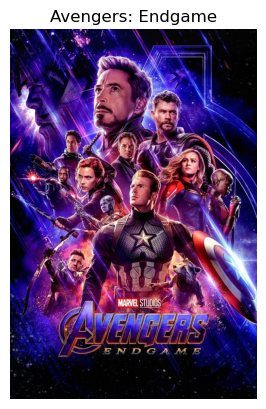

Recommendations



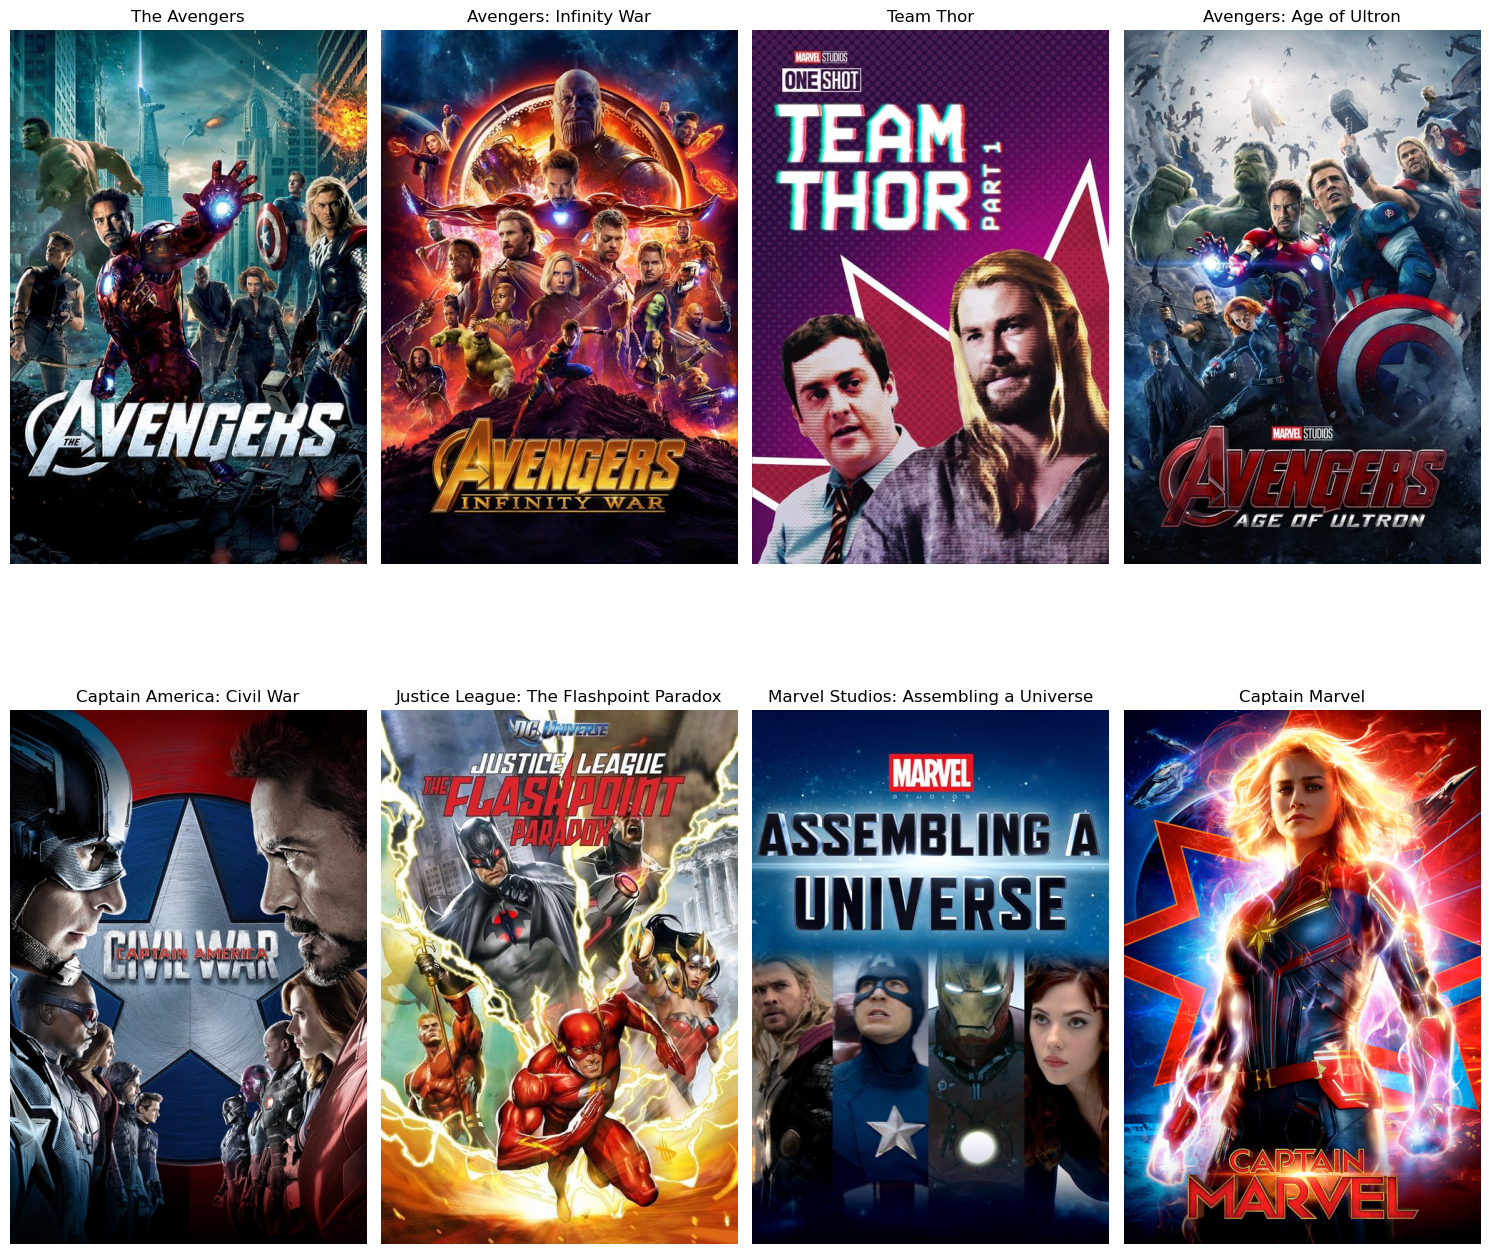

In [27]:
get_recommendations("Avengers: Endgame")

In [29]:
pickle.dump(df1,open('movie_list.pkl','wb'))
pickle.dump(tfidf_matrix,open('tfidf_matrix.pkl','wb'))